
## **Project Overview**
This project applies *Convolutional Neural Networks (CNNs)* to a *Natural Language Processing (NLP)* task:  
*classifying emotions from text data*.  

The dataset contains sentences labeled with emotions such as *joy, sadness, anger, fear, love, and surprise*.  
Our goal is to build a deep learning model that can automatically detect the underlying emotion in a given sentence.

---

# **Objectives**
- Perform text preprocessing (tokenization, padding).  
- Use an *Embedding layer* to convert words into dense vectors.  
- Build a *CNN-based model* to capture local patterns in text.  
- Train and evaluate the model on the dataset.  
- Visualize performance and analyze metrics like *accuracy, precision, recall, and F1-score*.  

---

# **Dataset**
- *Source*: [Kaggle - Emotions Dataset for NLP](https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp)  
- *Format*: CSV file with:  
  - text → input sentence/phrase.  
  - emotion → target label (emotion category).  

---

# **Tools & Libraries**
- Python   
- TensorFlow / Keras
- NumPy & Pandas   
- Matplotlib   
- scikit-learn   

---

# **Expected Outcome**
By the end of this notebook, we will have:  
- A trained *CNN model* applied to an *NLP problem* (emotion classification).  
- Visualized results of the training process.  
- Evaluation metrics showing how well the model predicts unseen text data.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout




#  **Load the dataset (Kaggle dataset: emotions.csv)**


In [2]:
train_df = pd.read_csv("train.txt", sep=";", names=["text", "emotion"])
test_df  = pd.read_csv("test.txt", sep=";", names=["text", "emotion"])
val_df   = pd.read_csv("val.txt", sep=";", names=["text", "emotion"])

# Combine train + val for full training set
df = pd.concat([train_df, val_df], ignore_index=True)

print(df.head())

                                                text  emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger


# 🔎 **Exploratory Data Analysis (EDA)**

Before training the CNN model, let's explore the dataset to better understand its structure, class distribution, and text properties.  

The main goals of this section are:
- Analyze the *distribution of emotions*.  
- Inspect the *length of sentences*.  
- Visualize *frequent words* using word clouds.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
/tmp/ipython-input-773688571.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="emotion", data=df, order=df['emotion'].value_counts().index, palette="Set2")


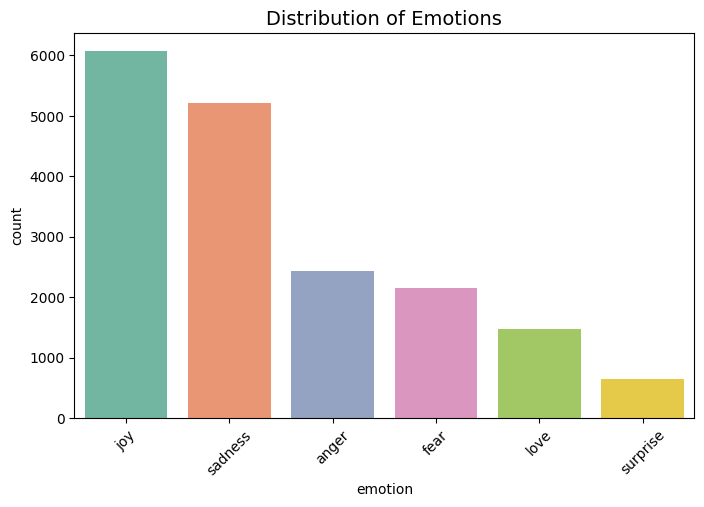

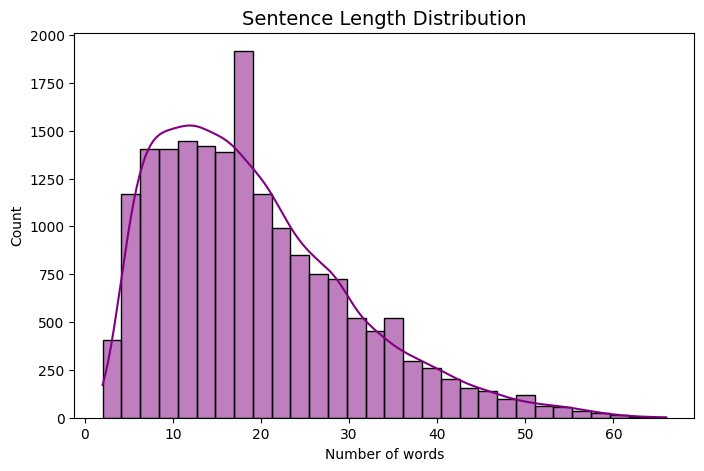

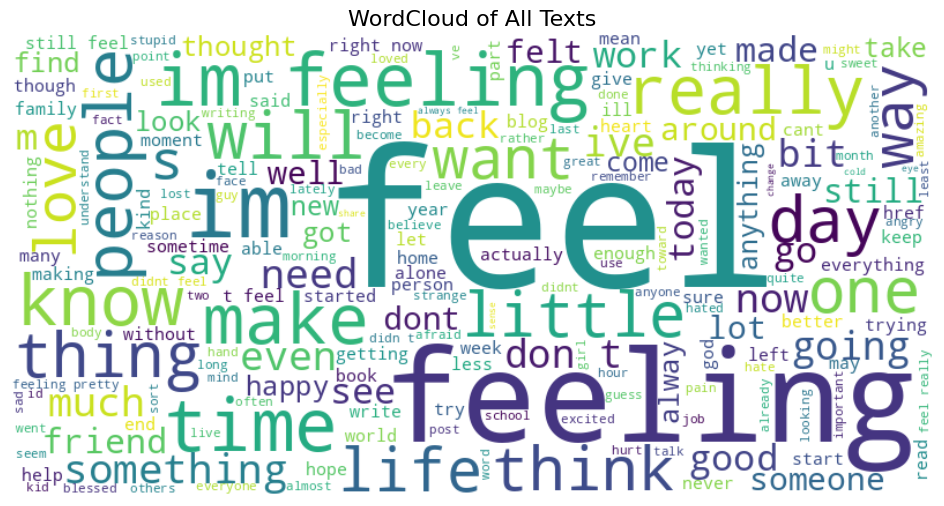

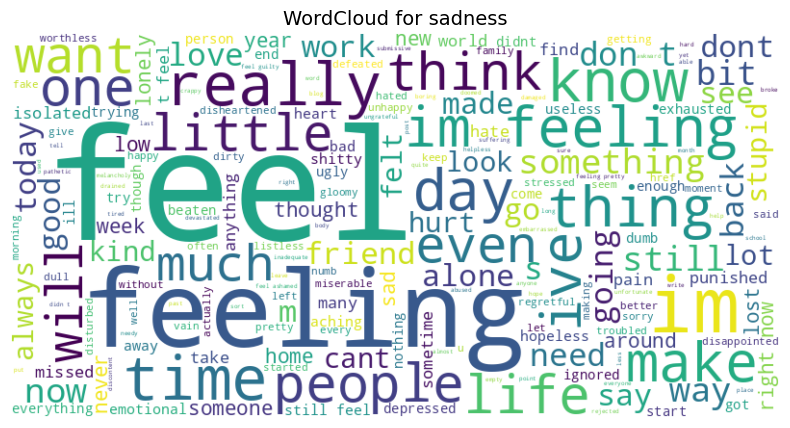

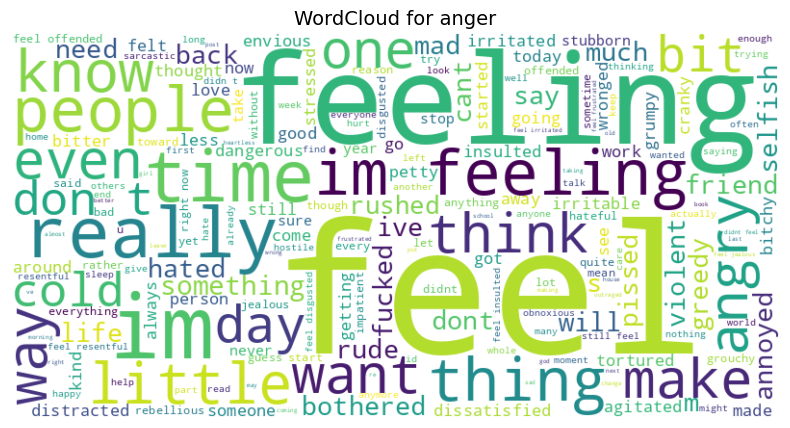

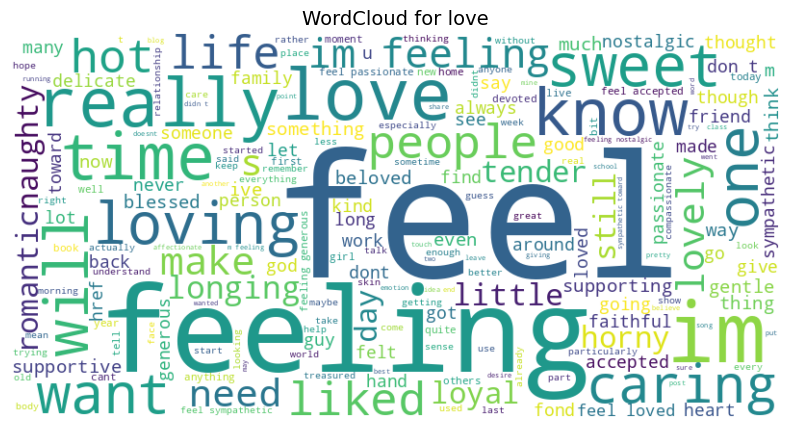

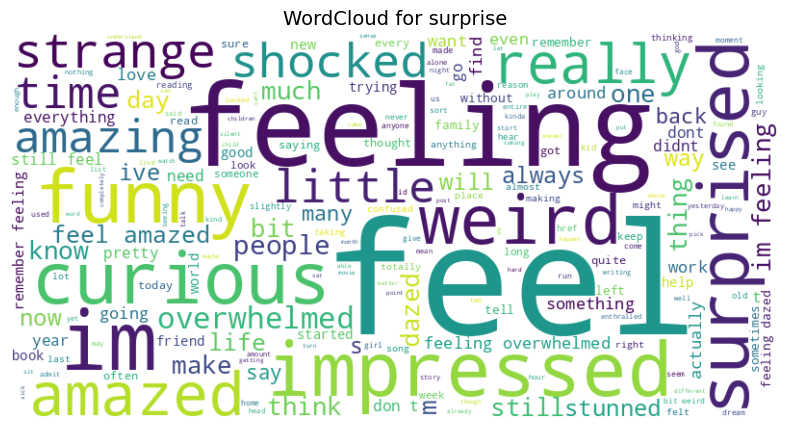

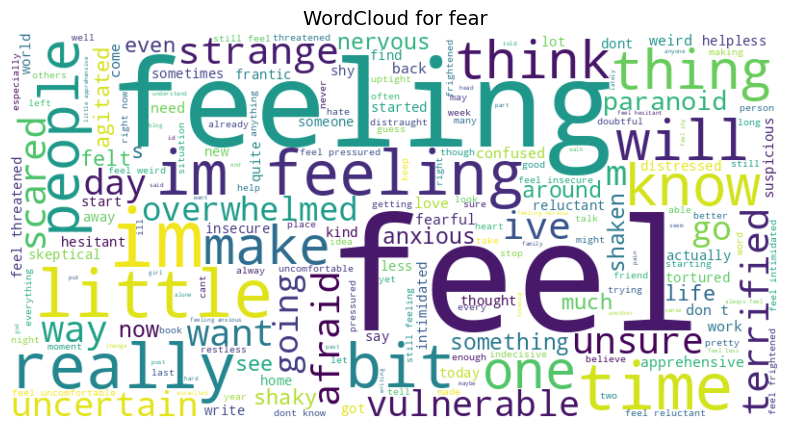

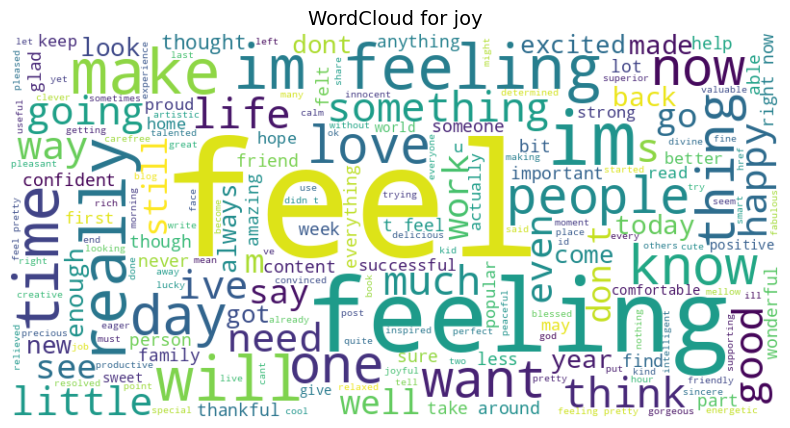

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') # Download the missing resource
from nltk.tokenize import word_tokenize


#  Distribution of emotions
plt.figure(figsize=(8,5))
sns.countplot(x="emotion", data=df, order=df['emotion'].value_counts().index, palette="Set2")
plt.title("Distribution of Emotions", fontsize=14)
plt.xticks(rotation=45)
plt.show()

#  Sentence length analysis
df["sentence_length"] = df["text"].apply(lambda x: len(word_tokenize(str(x))))
plt.figure(figsize=(8,5))
sns.histplot(df["sentence_length"], bins=30, kde=True, color="purple")
plt.title("Sentence Length Distribution", fontsize=14)
plt.xlabel("Number of words")
plt.show()

#  WordCloud for all text
all_text = " ".join(df["text"].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of All Texts", fontsize=16)
plt.show()

#  WordCloud per emotion
emotions = df["emotion"].unique()
for emotion in emotions:
    text = " ".join(df[df["emotion"]==emotion]["text"].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for {emotion}", fontsize=14)
    plt.show()

In [6]:
texts = df['text'].astype(str).tolist()
labels = df['emotion'].tolist()

#  **Encode the labels (convert emotions into integers)**


In [7]:
encoder = LabelEncoder()
y = encoder.fit_transform(labels)


#  **Prepare text sequences**


In [8]:
max_words = 10000   # keep the top 10k most frequent words
max_len = 100       # maximum length of each text

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=max_len, padding='post')


#  **Train/Test split**


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  **Build CNN model**


In [10]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=100, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(encoder.classes_), activation='softmax')  # number of classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


#  **Train**


In [11]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)


Epoch 1/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3929 - loss: 1.5270 - val_accuracy: 0.8111 - val_loss: 0.5914
Epoch 2/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8589 - loss: 0.4504 - val_accuracy: 0.9066 - val_loss: 0.2501
Epoch 3/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9474 - loss: 0.1632 - val_accuracy: 0.9208 - val_loss: 0.2098
Epoch 4/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9637 - loss: 0.1048 - val_accuracy: 0.9153 - val_loss: 0.2265
Epoch 5/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9774 - loss: 0.0698 - val_accuracy: 0.9111 - val_loss: 0.2800


#  **Evaluate**


In [12]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9133 - loss: 0.2875
Test Accuracy: 0.92


#  **Prediction example**


In [13]:
sample_texts = [
    "I am so happy today!",
    "I feel very sad and lonely",
    "This makes me really angry!",
    "I am surprised by the news"
]

seq = tokenizer.texts_to_sequences(sample_texts)
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)

for i, t in enumerate(sample_texts):
    emotion = encoder.classes_[pred[i].argmax()]
    print(f"{t} → {emotion}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
I am so happy today! → joy
I feel very sad and lonely → sadness
This makes me really angry! → fear
I am surprised by the news → surprise
